# Logistic Regression
## Fundamentos de la técnica
Regresión logistica es una tecnica supervisada de machine learning. Es un tipo de algoritmo de clasificación que predice un variable discreta.
En la regresión logistica se predice un probabilidad de que ocurra un evento (Lee, 2025).

## Descripción de las librerías usadas

- **scikit-learn**: biblioteca para modelado de Machine Learning (p. ej. `LogisticRegression`, particionado de datos, métricas).
- **pandas**: estructura DataFrame para manipulación y exploración de datos.
- **numpy**: operaciones numéricas y arrays.
- **matplotlib / seaborn**: visualización de datos y gráficos.

##  Modelo Matemático

### Odds
Odds compara posibilidad que un evento ocurra con la posibilidad de que no.
$$\frac{P(E)}{1-P(E)}$$

Sin embargo los odds no son simetricos alrededor de 1. Para solucionar eso tomamos el logaritmo que transforma la escala $[0, ∞]$ a $[-∞,∞]$. Esto es conocido como log-odds o logit.
$$\log\left(\frac{P(E)}{1 - P(E)}\right)$$

$$z = b + w_1x_1 + w_2x_2+…+w_Nx_N$$

- $z$ es la salida de la función log odds.
- $b$ es el sesgo.

$$y' = \frac{1}{1+e^{-z}}$$

- $y'$ es la salida del model de regresión logistica.
- $e$ es el numero de Euler $e ≈ 2.71828$

### Log loss
Retorna el logaritmo de la magnitud de cambio, en lugar de la distancia de los datos a la predicción

$$LL = \sum_{i=1}^{N}y_ilog\left(y'_i\right)+\left(1-y_i\right)log\left(1-y'_i\right)$$

- $N$ es el numero de ejemplos en el dataset
- $i$ es el index del ejemplo en el dataset
- $y_i$ es el label del ejemplo $i$th.
- $y'_i$ es la prediccion del modelo.


$$\frac{∂σ}{∂z}σ(z) = σ(z)[1-σ(z)]$$

donde

$$z = b + w_1x_1 + w_2x_2+…+w_Nx_N = W^Tx$$

$$\frac{∂}{∂w_i} = σ(W^Tx)[1-σ(W^Tx)]x_i = y'(1-y')x_i$$

$$
\frac{\partial LL(W)}{\partial w_j}
= \frac{\partial LL(W)}{\partial y'}
   \frac{\partial y'}{\partial w_j}
= \frac{\partial LL(W)}{\partial y'}\,y'(1-y')\,x_j
= \left(\frac{y}{y'}-\frac{1-y}{1-y'}\right)y'(1-y')\,x_j
$$




## Pipeline
### Preprocesamiento

In [ ]:
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np

X, y = make_classification(n_samples=1000, n_features=2,
                           n_redundant=0, n_informative=2,
                           n_repeated=0, n_classes=2,
                           random_state=1337)

df = pd.DataFrame(X, columns=['x1', 'x2'])
df['y'] = y
df.describe()


,x1,x2,y
count,1000.000000,1000.000000,1000.00000
mean,-0.000903,-0.026869,0.50000
std,1.239581,1.283674,0.50025
min,-3.911214,-3.298918,0.00000
25%,-0.981838,-1.038957,0.00000
50%,0.329258,-0.039165,0.50000
75%,1.017390,0.965541,1.00000
max,2.471400,3.869615,1.00000


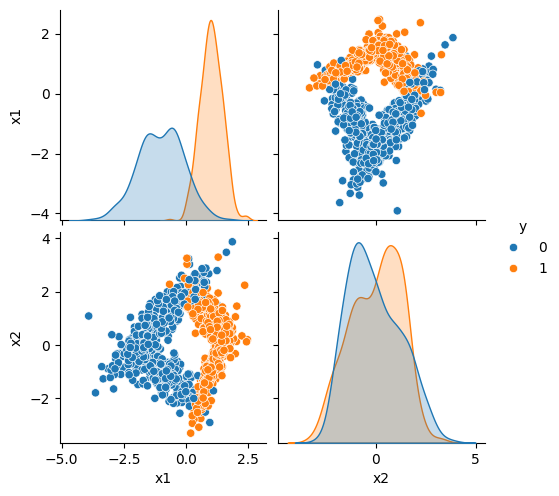

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df, hue='y')

### Prediction

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### Clase: LogisticRegression (sklearn.linear_model)

Breve: implementación de regresión logística que ajusta coeficientes mediante optimización
- Uso principal: `model = LogisticRegression()`; `model.fit(X_train, y_train)` entrena el modelo.

In [ ]:
def predict(x):
  return model.predict_proba(x)[:, 1]


In [ ]:
def predict_class(pattern):
  return model.predict(pattern)

sample_to_classify = X_test[0].reshape(1, -1)
predicted_class = predict_class(sample_to_classify)

print(f"Sample input: {sample_to_classify[0]}")
print(f"Predicted class: {predicted_class[0]}")
print(f"Actual class: {y_test[0]}")

Sample input: [ 1.52997259 -0.19464473]
Predicted class: 1
Actual class: 1


### Model evaluation

### Funciones definidas en el notebook

- `predict(x)`: devuelve la probabilidad de la clase positiva usando `model.predict_proba(x)[:, 1]`. Útil cuando se requiere un umbral o análisis de probabilidades.
- `predict_class(pattern)`: devuelve la etiqueta de clase (0/1) usando `model.predict(pattern)` para obtener la predicción discreta.

Accuracy: 0.96


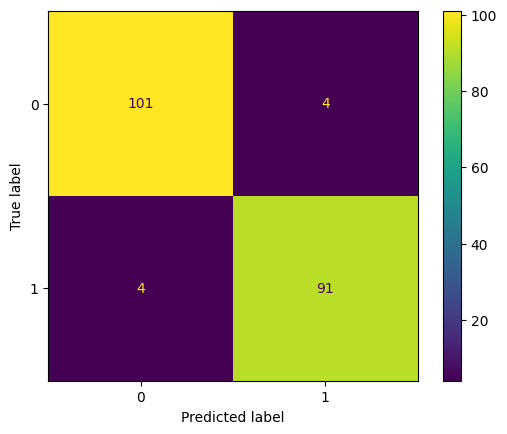

In [ ]:
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Referencias bibliograficas

- Google. (2025, September 22). Logistic regression: Calculating a probability with the sigmoid function | Machine Learning | Google for Developers. https://developers.google.com/machine-learning/crash-course/logistic-regression/sigmoid-function
- Google. (2025, October 3). Logistic regression: Loss and regularization | Machine Learning | Google for Developers. https://developers.google.com/machine-learning/crash-course/logistic-regression/loss-regularization
- Lee, F. (2025, May 14). What Is Logistic Regression? | IBM. https://www.ibm.com/think/topics/logistic-regression
- Stanford Online (Director). (2023, October 9). Stanford CS109 Probability for Computer Scientists I Logistic Regression I 2022 I Lecture 24 [Video recording]. https://www.youtube.com/watch?v=ILqZWvDWKEc

